In [414]:
import mysql.connector as sql
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [415]:
# Create SQL Connection
def make_connection():
    connection = sql.connect(
        host='localhost',
        user='felix',
        password = 'admin'
    )
    return connection

connection = make_connection()

In [416]:
cursor = connection.cursor()

cursor.execute('SHOW DATABASES')

for i in cursor:
    print(i)

('customer',)
('information_schema',)
('john',)
('mysql',)
('northwind',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [417]:
# Now we will define a function to make the use of pandas easier
def qr(query):
    df = pd.read_sql(query, con=connection)
    return df

In [418]:
qr('SHOW DATABASES')

,Database
0,customer
1,information_schema
2,john
3,mysql
4,northwind
5,performance_schema
6,sakila
7,sys
8,world


In [419]:
cursor.execute('use sakila')

In [420]:
qr('show tables')

,Tables_in_sakila
0,actor
1,actor_info
2,address
3,category
4,city
5,country
6,customer
7,customer_info
8,customer_list
9,film


In [421]:
qr('select * from actor_info')

,actor_id,first_name,last_name,film_info
0,1,PENELOPE,GUINESS,Animation: ANACONDA CONFESSIONS; Children: LAN...
1,2,NICK,WAHLBERG,Action: BULL SHAWSHANK; Animation: FIGHT JAWBR...
2,3,ED,CHASE,"Action: CADDYSHACK JEDI, FORREST SONS; Classic..."
3,4,JENNIFER,DAVIS,Action: BAREFOOT MANCHURIAN; Animation: ANACON...
4,5,JOHNNY,LOLLOBRIGIDA,"Action: AMADEUS HOLY, GRAIL FRANKENSTEIN, RING..."
...,...,...,...,...
195,196,BELA,WALKEN,Action: FANTASY TROOPERS; Animation: LUKE MUMM...
196,197,REESE,WEST,Action: ANTITRUST TOMATOES; Animation: DOORS P...
197,198,MARY,KEITEL,"Action: FANTASY TROOPERS, FORREST SONS, HANDIC..."
198,199,JULIA,FAWCETT,"Action: BERETS AGENT; Animation: LUKE MUMMY, T..."


In [422]:
df = qr('select actor.actor_id,actor.first_name,actor.last_name,actor.last_update,actor_info.film_info from actor inner join actor_info on actor.actor_id=actor_info.actor_id and actor.first_name = actor_info.first_name')

In [423]:
df.head()

,actor_id,first_name,last_name,last_update,film_info
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33,Animation: ANACONDA CONFESSIONS; Children: LAN...
1,2,NICK,WAHLBERG,2006-02-15 04:34:33,Action: BULL SHAWSHANK; Animation: FIGHT JAWBR...
2,3,ED,CHASE,2006-02-15 04:34:33,"Action: CADDYSHACK JEDI, FORREST SONS; Classic..."
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33,Action: BAREFOOT MANCHURIAN; Animation: ANACON...
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33,"Action: AMADEUS HOLY, GRAIL FRANKENSTEIN, RING..."


In [424]:
# See the min and max number of movie generes an actor has played in
print('Min: ',df['film_info'].str.split(pat=';').apply(len).min())
print('Max: ',df['film_info'].str.split(pat=';').apply(len).max())

Min:  8
Max:  16


In [425]:
films = df['film_info'].str.split(pat=';',expand=True)

In [426]:
films.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Animation: ANACONDA CONFESSIONS,Children: LANGUAGE COWBOY,"Classics: COLOR PHILADELPHIA, WESTWARD SEABIS...",Comedy: VERTIGO NORTHWEST,Documentary: ACADEMY DINOSAUR,"Family: KING EVOLUTION, SPLASH GUMP",Foreign: MULHOLLAND BEAST,"Games: BULWORTH COMMANDMENTS, HUMAN GRAFFITI","Horror: ELEPHANT TROJAN, LADY STAGE, RULES HUMAN",Music: WIZARD COLDBLOODED,"New: ANGELS LIFE, OKLAHOMA JUMANJI",Sci-Fi: CHEAPER CLYDE,Sports: GLEAMING JAWBREAKER,None,None,None
1,Action: BULL SHAWSHANK,Animation: FIGHT JAWBREAKER,Children: JERSEY SASSY,"Classics: DRACULA CRYSTAL, GILBERT PELICAN","Comedy: MALLRATS UNITED, RUSHMORE MERMAID",Documentary: ADAPTATION HOLES,Drama: WARDROBE PHANTOM,"Family: APACHE DIVINE, CHISUM BEHAVIOR, INDIA...","Foreign: BABY HALL, HAPPINESS UNITED",Games: ROOF CHAMPION,Music: LUCKY FLYING,"New: DESTINY SATURDAY, FLASH WARS, JEKYLL FRO...","Sci-Fi: CHAINSAW UPTOWN, GOODFELLAS SALUTE","Travel: LIAISONS SWEET, SMILE EARRING",None,None


In [427]:
films.apply(lambda x: x.str.split(pat=':'),axis=1).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,"[Animation, ANACONDA CONFESSIONS]","[ Children, LANGUAGE COWBOY]","[ Classics, COLOR PHILADELPHIA, WESTWARD SEAB...","[ Comedy, VERTIGO NORTHWEST]","[ Documentary, ACADEMY DINOSAUR]","[ Family, KING EVOLUTION, SPLASH GUMP]","[ Foreign, MULHOLLAND BEAST]","[ Games, BULWORTH COMMANDMENTS, HUMAN GRAFFITI]","[ Horror, ELEPHANT TROJAN, LADY STAGE, RULES ...","[ Music, WIZARD COLDBLOODED]","[ New, ANGELS LIFE, OKLAHOMA JUMANJI]","[ Sci-Fi, CHEAPER CLYDE]","[ Sports, GLEAMING JAWBREAKER]",None,None,None
1,"[Action, BULL SHAWSHANK]","[ Animation, FIGHT JAWBREAKER]","[ Children, JERSEY SASSY]","[ Classics, DRACULA CRYSTAL, GILBERT PELICAN]","[ Comedy, MALLRATS UNITED, RUSHMORE MERMAID]","[ Documentary, ADAPTATION HOLES]","[ Drama, WARDROBE PHANTOM]","[ Family, APACHE DIVINE, CHISUM BEHAVIOR, IND...","[ Foreign, BABY HALL, HAPPINESS UNITED]","[ Games, ROOF CHAMPION]","[ Music, LUCKY FLYING]","[ New, DESTINY SATURDAY, FLASH WARS, JEKYLL F...","[ Sci-Fi, CHAINSAW UPTOWN, GOODFELLAS SALUTE]","[ Travel, LIAISONS SWEET, SMILE EARRING]",None,None


In [428]:
films.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Animation: ANACONDA CONFESSIONS,Children: LANGUAGE COWBOY,"Classics: COLOR PHILADELPHIA, WESTWARD SEABIS...",Comedy: VERTIGO NORTHWEST,Documentary: ACADEMY DINOSAUR,"Family: KING EVOLUTION, SPLASH GUMP",Foreign: MULHOLLAND BEAST,"Games: BULWORTH COMMANDMENTS, HUMAN GRAFFITI","Horror: ELEPHANT TROJAN, LADY STAGE, RULES HUMAN",Music: WIZARD COLDBLOODED,"New: ANGELS LIFE, OKLAHOMA JUMANJI",Sci-Fi: CHEAPER CLYDE,Sports: GLEAMING JAWBREAKER,None,None,None
1,Action: BULL SHAWSHANK,Animation: FIGHT JAWBREAKER,Children: JERSEY SASSY,"Classics: DRACULA CRYSTAL, GILBERT PELICAN","Comedy: MALLRATS UNITED, RUSHMORE MERMAID",Documentary: ADAPTATION HOLES,Drama: WARDROBE PHANTOM,"Family: APACHE DIVINE, CHISUM BEHAVIOR, INDIA...","Foreign: BABY HALL, HAPPINESS UNITED",Games: ROOF CHAMPION,Music: LUCKY FLYING,"New: DESTINY SATURDAY, FLASH WARS, JEKYLL FRO...","Sci-Fi: CHAINSAW UPTOWN, GOODFELLAS SALUTE","Travel: LIAISONS SWEET, SMILE EARRING",None,None


In [429]:
generes = films.apply(lambda x: x.str.split(pat=':'),axis=1).apply(lambda x: x.str[0])
generes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Animation,Children,Classics,Comedy,Documentary,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,None,None,None
1,Action,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Music,New,Sci-Fi,Travel,None,None
2,Action,Classics,Documentary,Drama,Foreign,Music,New,Sci-Fi,Sports,Travel,None,None,None,None,None,None
3,Action,Animation,Comedy,Documentary,Drama,Family,Horror,Music,New,Sci-Fi,Sports,Travel,None,None,None,None
4,Action,Animation,Children,Comedy,Documentary,Drama,Games,Horror,Music,New,Sci-Fi,Sports,Travel,None,None,None


In [430]:
# Now we will see how many artists have played in which movie genere
import numpy as np
data = generes.agg(func=lambda x: x.value_counts()).apply(lambda x: x.dropna().sum())
dt = generes.agg(func=lambda x: x.value_counts())
dt.replace(to_replace=np.nan,value=0, inplace=True)
dt = dt.T
dt.head(4)


,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel,Action,Animation,Children
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.0,29.0,5.0
1,137.0,45.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,113.0,55.0,23.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,91.0,57.0,34.0,13.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [431]:
tmp = dt.apply(np.sum,axis=0)
print('Top five movies played in: ')
tmp.sort_values(ascending=False).head(5)

Top five movies played in: 


 Sports         182.0
 Foreign        175.0
 New            169.0
 Documentary    168.0
 Sci-Fi         167.0
dtype: float64

<AxesSubplot:>

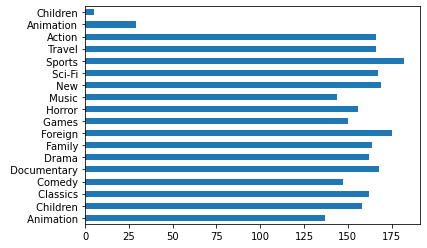

In [432]:
import matplotlib.pyplot as plt
import seaborn as sb
tmp.plot(kind='barh')

In [433]:
films.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Animation: ANACONDA CONFESSIONS,Children: LANGUAGE COWBOY,"Classics: COLOR PHILADELPHIA, WESTWARD SEABIS...",Comedy: VERTIGO NORTHWEST,Documentary: ACADEMY DINOSAUR,"Family: KING EVOLUTION, SPLASH GUMP",Foreign: MULHOLLAND BEAST,"Games: BULWORTH COMMANDMENTS, HUMAN GRAFFITI","Horror: ELEPHANT TROJAN, LADY STAGE, RULES HUMAN",Music: WIZARD COLDBLOODED,"New: ANGELS LIFE, OKLAHOMA JUMANJI",Sci-Fi: CHEAPER CLYDE,Sports: GLEAMING JAWBREAKER,None,None,None
1,Action: BULL SHAWSHANK,Animation: FIGHT JAWBREAKER,Children: JERSEY SASSY,"Classics: DRACULA CRYSTAL, GILBERT PELICAN","Comedy: MALLRATS UNITED, RUSHMORE MERMAID",Documentary: ADAPTATION HOLES,Drama: WARDROBE PHANTOM,"Family: APACHE DIVINE, CHISUM BEHAVIOR, INDIA...","Foreign: BABY HALL, HAPPINESS UNITED",Games: ROOF CHAMPION,Music: LUCKY FLYING,"New: DESTINY SATURDAY, FLASH WARS, JEKYLL FRO...","Sci-Fi: CHAINSAW UPTOWN, GOODFELLAS SALUTE","Travel: LIAISONS SWEET, SMILE EARRING",None,None


In [434]:
df.head(2)

,actor_id,first_name,last_name,last_update,film_info
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33,Animation: ANACONDA CONFESSIONS; Children: LAN...
1,2,NICK,WAHLBERG,2006-02-15 04:34:33,Action: BULL SHAWSHANK; Animation: FIGHT JAWBR...


In [435]:
df.join(films)

,actor_id,first_name,last_name,last_update,film_info,0,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33,Animation: ANACONDA CONFESSIONS; Children: LAN...,Animation: ANACONDA CONFESSIONS,Children: LANGUAGE COWBOY,"Classics: COLOR PHILADELPHIA, WESTWARD SEABIS...",Comedy: VERTIGO NORTHWEST,Documentary: ACADEMY DINOSAUR,...,Foreign: MULHOLLAND BEAST,"Games: BULWORTH COMMANDMENTS, HUMAN GRAFFITI","Horror: ELEPHANT TROJAN, LADY STAGE, RULES HUMAN",Music: WIZARD COLDBLOODED,"New: ANGELS LIFE, OKLAHOMA JUMANJI",Sci-Fi: CHEAPER CLYDE,Sports: GLEAMING JAWBREAKER,None,None,None
1,2,NICK,WAHLBERG,2006-02-15 04:34:33,Action: BULL SHAWSHANK; Animation: FIGHT JAWBR...,Action: BULL SHAWSHANK,Animation: FIGHT JAWBREAKER,Children: JERSEY SASSY,"Classics: DRACULA CRYSTAL, GILBERT PELICAN","Comedy: MALLRATS UNITED, RUSHMORE MERMAID",...,Drama: WARDROBE PHANTOM,"Family: APACHE DIVINE, CHISUM BEHAVIOR, INDIA...","Foreign: BABY HALL, HAPPINESS UNITED",Games: ROOF CHAMPION,Music: LUCKY FLYING,"New: DESTINY SATURDAY, FLASH WARS, JEKYLL FRO...","Sci-Fi: CHAINSAW UPTOWN, GOODFELLAS SALUTE","Travel: LIAISONS SWEET, SMILE EARRING",None,None
2,3,ED,CHASE,2006-02-15 04:34:33,"Action: CADDYSHACK JEDI, FORREST SONS; Classic...","Action: CADDYSHACK JEDI, FORREST SONS","Classics: FROST HEAD, JEEPERS WEDDING","Documentary: ARMY FLINTSTONES, FRENCH HOLIDAY...","Drama: LUCK OPUS, NECKLACE OUTBREAK, SPICE SO...","Foreign: COWBOY DOOM, WHALE BIKINI",...,"New: EVE RESURRECTION, PLATOON INSTINCT",Sci-Fi: WEEKEND PERSONAL,"Sports: ARTIST COLDBLOODED, IMAGE PRINCESS",Travel: BOONDOCK BALLROOM,None,None,None,None,None,None
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33,Action: BAREFOOT MANCHURIAN; Animation: ANACON...,Action: BAREFOOT MANCHURIAN,"Animation: ANACONDA CONFESSIONS, GHOSTBUSTERS...",Comedy: SUBMARINE BED,"Documentary: BED HIGHBALL, NATIONAL STORY, RA...","Drama: BLADE POLISH, GREEDY ROOTS",...,Horror: TREASURE COMMAND,"Music: HANOVER GALAXY, REDS POCUS","New: ANGELS LIFE, JUMANJI BLADE, OKLAHOMA JUM...","Sci-Fi: RANDOM GO, SILVERADO GOLDFINGER, UNFO...","Sports: INSTINCT AIRPORT, POSEIDON FOREVER",Travel: BOONDOCK BALLROOM,None,None,None,None
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33,"Action: AMADEUS HOLY, GRAIL FRANKENSTEIN, RING...","Action: AMADEUS HOLY, GRAIL FRANKENSTEIN, RING...",Animation: SUNRISE LEAGUE,Children: HALL CASSIDY,Comedy: DADDY PITTSBURGH,"Documentary: BONNIE HOLOCAUST, METAL ARMAGEDD...",...,Games: FIRE WOLVES,"Horror: COMMANDMENTS EXPRESS, LOVE SUICIDES, ...","Music: BANGER PINOCCHIO, HEAVENLY GUN","New: FRONTIER CABIN, RIDGEMONT SUBMARINE","Sci-Fi: DAISY MENAGERIE, GOODFELLAS SALUTE, S...","Sports: GROOVE FICTION, KRAMER CHOCOLATE, STA...","Travel: ENOUGH RAGING, ESCAPE METROPOLIS, SMI...",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,BELA,WALKEN,2006-02-15 04:34:33,Action: FANTASY TROOPERS; Animation: LUKE MUMM...,Action: FANTASY TROOPERS,"Animation: LUKE MUMMY, NASH CHOCOLAT","Children: HOLLYWOOD ANONYMOUS, LEGALLY SECRET...","Classics: JERK PAYCHECK, SNATCHERS MONTEZUMA","Comedy: ELEMENT FREDDY, FLINTSTONES HAPPINESS...",...,"Drama: BEETHOVEN EXORCIST, JACKET FRISCO",Family: SIEGE MADRE,Foreign: TRAP GUYS,"Games: MARS ROMAN, PIZZA JUMANJI, TYCOON GATH...",Horror: CARRIE BUNCH,Music: ENEMY ODDS,New: OKLAHOMA JUMANJI,Sci-Fi: WHISPERER GIANT,Travel: COMFORTS RUSH,None
196,197,REESE,WEST,2006-02-15 04:34:33,Action: ANTITRUST TOMATOES; Animation: DOORS P...,Action: ANTITRUST TOMATOES,"Animation: DOORS PRESIDENT, TURN STAR",Children: GORGEOUS BINGO,"Classics: DRACULA CRYSTAL, MALKOVICH PET, SNA...",Comedy: LIFE TWISTED,...,"Drama: HOBBIT ALIEN, SAINTS BRIDE, WITCHES PANIC","Family: BEDAZZLED MARRIED, CHOCOLAT HARRY, RE...","Foreign: AGENT TRUMAN, LOSE INCH, SCHOOL JACKET","Games: CREATURES SHAKESPEARE, ROUGE SQUAD","Horror: DRUMS DYNAMITE, YENTL IDAHO",Music: RUNNER MADIGAN,"New: GODFATHER DIARY, WILD APOLLO","Sci-Fi: GOODFELLAS SALUTE, WEEKEND PERSO